# Set de datos sobre Cancer Cerebral
### Por: *Marcos Figueroa - Álvaro Monsalve*  
### Tutores: *José Reyes- Sebástian Bustamante*
### Métodos de Aprendizajes Automáticos Aplicados
### IDVRV - Univesidad de Talca
---
## Resumen:
### 
### A continuación encontrará una lectura de un set de datos sobre varias resonancias mágneticas con la finalidad de clasificar que persona tiene un tumor cerebral, en donde este contiene 5 atributos de primer orden y 8 atributos que tratan sobre la textura relacionado con la primera clase y que contiene un dato con comportamiento booleano en donde **si existe tumor = 1** y **no existe tumor = 0**:
### Características de primer orden
- Media
- Diferencia
- Desviación estándar
- Simetría de la curva
- Curtosis

### Características de segundo orden
- Contraste
- Energía
- ASM (segundo momento angular)
- Entropía
- Homogeneidad
- Disimilitud
- Correlación
- Tosquedad
### La columna de imagen define el nombre de la imagen y la columna de clase define si la imagen tiene tumor o no (1 = tumor, 0 = no tumor)
### 
### Los examenes son resonancias magneticas y esta es una referencia:
### ![brain](referenceimage.png)
---
## Objetivo:
### Describir el data set como primer objetivo para aprender a usar librerías relacionadas con ML y DL.
## Meta: 
### Crear un algoritmo complejo capaz de detetectar tumores cerebrales a partir de identificar patrones en imagenes.
---
## Referencia:
### Dataset Kaggle [BrainTumor](https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor)

In [1]:
# Primero es importante exportar las librerias necesarias para trabajar el archivo de tipo.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

## Lectura de datos
### Para leer el dataset usamos la funcón read_cvs(), la cual lee la tabla que contiene los datos.
### En este apartado encontramos 15 columnas, en cada columna nos encontramos un atributo que pertenece a cada caso y cada atributo tiene un relación directa con las imagenes.
### De primer orden
- **Image**: Hace referencia al nombre de la imagen asociada a los datos correspondientes.
- **Class**: Indica si en la imagen del cerebro hay un tumor cerebral.
- **Mean**:  Es la media aritmetica y hace referencia a la media de valores que contienen los píxeles, a medida que la media aumenta el brillo de la imagen igual.
- **Variance**: Es la varianza y es una medida de dispersión, en este caso la varianza indica la dispersión que tiene cada imagen con respecto a la media aritmética.
- **Standard Deviation**: Se utiliza para cuantificar la variación de los datos con respecto a la media, es la raíz de la varianza.
- **Entropy**: La entropía mide el nivel el nivel de desorden los pixeles en cuanto se trata de imagenes, en teoria de la información la entropia hace referencia al nivel de incertidumbre, si el nivel de entropia es alto, indica que tendrá menos certeza de lo que sucede, eso en cuanto a imagenes de resonancias mageneticas se traduce en que hay una área del tejido en donde es más dificil identificar a que corresponde, lo que lo convierte en un mayor área de interes, ya que, se pueden encontrar tumores cerebrales.
- **Skewness**:  Se interpreta como asimetria y el atributo hace referencia a esto mismo, valores positivos indican que los valores se extienden por sobre la media, lo que indica que la cola de la distribución o cola de esta apunta hacia la izquiera, lo contrario con los valores negativos que se extienden a la izquierda y la cola se acumula a la derecha, esto en una imagen se traduce en que una asimetria negativa significa valores oscuros que se pueden relacionar con necrosis ocasionada por un tumor y lo contrario una asimetria muy pronunciada hacia la izquierda puede significar en valores demasiados brillantes, lo que se traduce en posible tumor.
### De segundo orden: Estos tipos de atributos hacen referencia hacia el 
- **Kurtosis**: Nos ayuda a compreder como se comportan los datos a través de la curva, podemos descubrir si la distribución tiene colas pesadas y también ver si existen datos atípicos.
- **Contrast**: Se refiere al nivel de diferenciacion entres las distintas partes de la imagen.
- **Energy**: Se refiere que capta la intensidad o actividad dentro de la imagen, puede relacionarse con la textura o el nivel de actividad en una región especifica.
- **ASM**: Es una caractetistica de la matriz de co-ocurrencia mide la uniformidad o la repetición de patrones en la imagen, un valor alto indica una textura más uniforme, mientras que bajo sugiere una textura más caótica o variada.
- **Homogeneity**: Mide lo cerca que están los valores de los píxeles en la matriz de co-ocurrencia. Un valor alto sugiere una textura suave o uniforme, mientras que un valor bajo sugiere mayor variabilidad en la textura.
- **Correlation**: Mide cómo se correlacionan las intensidades de píxeles en relación con sus vecinos. Un valor alto de correlación indica que los píxeles tienen una fuerte relación lineal, al contrario un valor bajo la textura es más heterogénea o desordenada.
- **Dissimilarity**: Medida que calcula la diferencia de intensidad entre pares de píxeles. A diferencia de la homogeneidad, la dissimilaridad otorga mayor peso a las diferencias más grandes entre píxeles. Un valor alto de dissimilaridad indica que hay una gran variación entre los píxeles adyacentes, lo que sugiere una textura más rugosa o variada, mientras que un valor bajo indica una textura más uniforme.
- **Coarseness**: El atributo "coarseness" en el análisis de imágenes es una medida de la escala de la textura, que evalúa cuán grandes son las estructuras presentes en una imagen. Un valor alto de coarseness indica que la imagen tiene texturas más gruesas o estructuras grandes, mientras que un valor bajo sugiere texturas finas o detalles pequeños. Esta medida es útil para distinguir entre regiones con diferentes tipos de texturas, como áreas lisas versus áreas rugosas o detalladas.

In [2]:
# Impresión del dataset.
df_brain_tumor = pd.read_csv("brain_tumor.csv")

#Normalizacion del set de datos

In [3]:
##dfskewness = df_brain_tumor[df_brain_tumor["Skewness"] > 0 and df_brain_tumor[df_brain_tumor["Skewness"]] < 0]
##print(dfskewness.sum())




### Revisar si el dataset contiene datos erroneos

In [4]:
# Revisar la cantidad de datos perdidos, es decir, NaN (Not a Number) dentro de un dataframe de pandas
df_brain_tumor.isna().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

# Revisión de datos duplicados

In [5]:
print(df_brain_tumor.duplicated().sum())

0


# Describe

In [6]:
# Mas descriptores generales
df_general = df_brain_tumor.describe()

df_general.to_csv('archivo_general.csv', index=False)

# Info

In [7]:
df_brain_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

# Primeros 5 y últimos datos.

In [8]:
df_brain_tumor.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [9]:
df_brain_tumor.tail()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155
3761,Image3762,0,6.110138,480.884025,21.929068,0.118171,4.110669,17.538826,239.251388,0.306224,0.093773,0.494333,6.787329,0.938731,7.458341e-155


# Tipo de dato de cada columna

In [10]:
df_brain_tumor.dtypes

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

# Valores unicos de cada columna

In [11]:
cols = df_brain_tumor.columns.tolist()
for col in cols:
  print(f"{col}: {df_brain_tumor[col].unique()}")

Image: ['Image1' 'Image2' 'Image3' ... 'Image3760' 'Image3761' 'Image3762']
Class: [0 1]
Mean: [ 6.53533936  8.74996948  7.34109497 ... 18.01152039 13.33042908
  6.11013794]
Variance: [ 619.58784457  805.957634   1143.80821918 ... 1151.58276464  945.73277931
  480.88402451]
Standard Deviation: [24.89152154 28.38939298 33.82023387 ... 33.93497848 30.75276864
 21.92906803]
Entropy: [0.10905901 0.26653831 0.00146681 ... 0.06839642 0.08787158 0.11817106]
Skewness: [4.27647703 3.71811563 5.06175041 ... 2.30834902 2.73282188 4.11066928]
Kurtosis: [18.90057479 14.46461754 26.47956316 ...  5.57949801  7.75756973
 17.53882608]
Contrast: [ 98.61397059  63.85881588  81.86720593 ... 167.13011775 223.81293215
 239.25138757]
Energy: [0.2933145  0.4750513  0.03191671 ... 0.22892964 0.26152746 0.30622405]
ASM: [0.08603339 0.22567373 0.00101868 ... 0.05240878 0.06839661 0.09377317]
Homogeneity: [0.53094113 0.65135203 0.26827489 ... 0.49226894 0.48006365 0.49433266]
Dissimilarity: [4.47334559 3.22007157

# Generar un dataframe a partir de otro
## En este caso generaremos uno a partir de todos los elementos que tengan en clase igual a 1

# Correlación

In [12]:
#Importar librería
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Excluir lo datos categoricos
df_numerico = df_brain_tumor.select_dtypes(include=[float])
df_no_numerico = df_brain_tumor.select_dtypes(exclude=[float])

#Escalar el dataframe
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)
df_final = pd.concat([df_no_numerico.reset_index(drop=True), df_normalizado], axis=1)
#print(df_final.head())
#
df_final.to_csv('dataset_normalizado.csv', index=False)
df_final.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0
1,Image2,0,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0
2,Image3,1,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0
3,Image4,1,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0
4,Image5,0,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0


## Dividiendo los datos

Precisión: 0.98
Matriz de Confusión:
[[416   3]
 [ 11 323]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



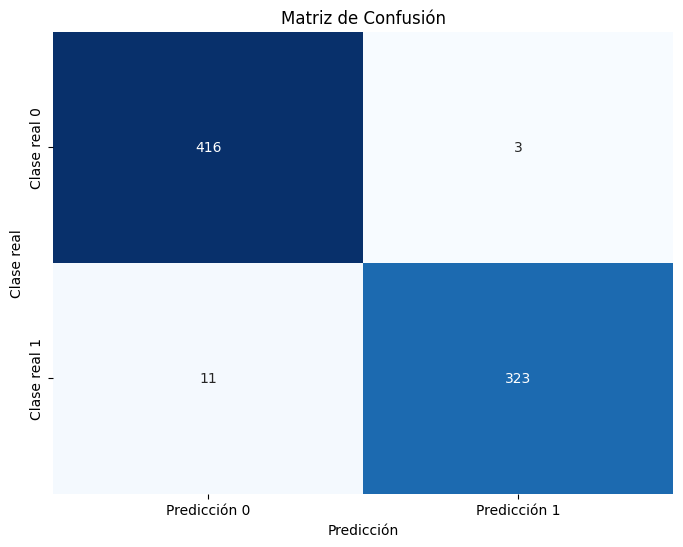

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Dividir el set de datos para entrenamiento
X = df_final.drop(['Class', 'Image'], axis=1)  # Características
y = df_final['Class'] #Etiqueta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Ajusta el valor de k según sea necesario

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(class_report)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[f'Predicción {i}' for i in range(conf_matrix.shape[1])], 
            yticklabels=[f'Clase real {i}' for i in range(conf_matrix.shape[0])])

plt.xlabel('Predicción')
plt.ylabel('Clase real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Dividir el set de datos para entrenamiento
X = df_final.drop(['Class', 'Image'], axis=1)  # Características
y = df_final['Class']  # Etiqueta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluar KNN con distintos valores de k
knn_accuracies = {}
for k in [3, 5, 7, 9]:  # Cambia los valores de k según sea necesario
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies[k] = accuracy

# Entrenar y evaluar un Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Mostrar resultados
print("Desempeño de KNN con distintos valores de k:")
for k, acc in knn_accuracies.items():
    print(f"K={k}: Precisión = {acc:.2f}")

print(f"\nDesempeño del Árbol de Decisión: Precisión = {tree_accuracy:.2f}")

# Visualizar matriz de confusión del Árbol de Decisión
plt.figure(figsize=(8, 6))
sns.heatmap(tree_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=[f'Predicción {i}' for i in range(tree_conf_matrix.shape[1])],
            yticklabels=[f'Clase real {i}' for i in range(tree_conf_matrix.shape[0])])
plt.xlabel('Predicción')
plt.ylabel('Clase real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()